# Neural Network

Starting from this lecture, we will discuss neural network which is one of the most popular models. 

We have learned machine learning. You may have heard deep learning. **Deep Learning** is a subset of Machine Learning. Learning problems using deep neural network is called deep learning.

## Fully Connected Neural Networks

Fully connected neural looks like

![](https://deeplearningmath.org/images/Fully_connected_NN.png)


We have

- `input layer`: the first layer

- `output layer`: the last layer

- `hidden layer`: layers between input layer and output layer

- `neuron`: each circle in above plots

- `weights`: neurons are connected and represented by edges, on each edge we have weights

- `bias`: on each neuron, we do some operations and bias will be added

- `width`: number of neurons on each (hidden) layer

- `depth`: number of hidden layers (maybe different in other places)

**Shallow neural network:** depth is 1

**Deep neural network:** depth is larger than 1


Mathematically, we can treat neural network as a multivariate function. Given some inputs at the first layer, we do some operations and obtain some outputs.

## Operations between neurons and layers: Forward propogation

In class.

# Training neural network: backward propogation

In short, training neural network is equivalent to finding weights and bias by solving an optimization problem. We expect to find "best" weights and bias such that your obtained Neural Network fits the training data well.

## Mathematics:

Let $f_{NN}(x)$ represents a neural network, then $f_{NN}(x_i)$ will be the predicted value corresponding to the $i$-th input $x_i$ and approximates $y_i$. We want to find $f_{NN}$, which is parametrized by weights $W$ and bias $b$, such that $f_{NN}(x_i)$ is close to $y_i$. 

Now we need to solve the following optimization problem:

$$ \mathop{\mathrm{minimize}}_{W,b} \sum_{i=1}^{N} loss(y_i, f_{NN}(x_i)) $$

### Loss function

Usually, we use loss function to characterize the difference between true label and its approximation. We expect the loss is as small as possible.

Regression: 
- `square loss`:  $loss(y,\hat{y}) = (y-\hat{y})^2$

Classification:
- $ loss(y, \hat{y}) =  \begin{cases} 1 \mbox{ if } y\neq \hat{y} \\ 0 \mbox{ if } y = \hat{y} \end{cases}$

- `hinge loss`: $ loss(y, \hat{y}) = \max\{0, 1-y\hat{y}\} $
- `cross entropy`: $ loss(y, \hat{y}) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}) $

## Algorithm: SGD

We still use SGD to solve above optimization problem. However, computations are really complicated here since it is hard to compute(approximate) gradient (compared with regression problem).

Computing gradient is based on chain rule. If you are interested in the analytic computation, please read the following notes:

1. https://www.inf.ed.ac.uk/teaching/courses/mlpr/2017/notes/w5a_backprop.pdf
2. https://deeplearning.cs.cmu.edu/S22/document/slides/lec5.pdf

I do not expect that you understand all the details and write your own SGD. We will use python to train neural network.



## Python libraries: Tensorflow vs pytorch

Tensorflow and PyTorch are two libraries for implementing neural network. We will discuss tensorflow during the lecture and your TA will help you understand PyTorch.

The question I always receive is:  which library I should use/learn? What is the difference?

Here is one comparison I find online: https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/

My personal answer is the following: 
1. It is better to learn tensorflow first and then learn PyTorch because it is easy to call commands from tensorflow. Using PyTorch requires strong programming background and better understanding on Theory. 

2. However, PyTorch is more popular recently. Many researchers and companies are using PyTorch, which means that you can find more resources and well trained models.

3. Tensorflow is not compatible. Some commands supported in Tensorflow 1 are not available in Tensorflow 2. This means that if you are comfortable with Tensorflow 1, you still need to relearn Tensorflow 2. 

4. PyTorch is more flexible. Since writing PyTorch code is not simply calling commands, you have the freedom to write your own code and report what your want. For example, it is easy to report loss after each iteration (this is not a hard task in Theory) if you use PyTorch, but this is not easy to get if you use Tensorflow. 

# Applications: Iris Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

2024-05-10 14:02:53.919856: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# read data
data = load_iris()
X = data.data
y = data.target
target = data.target_names

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
# data preprocessing

# if you process X_train, must also process X_test

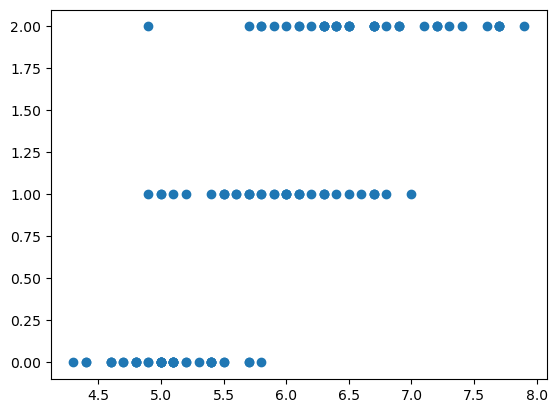

In [4]:
plt.scatter(X_train[:, 0], y_train)

In [26]:
# construct the model

model = tf.keras.models.Sequential(
    
    [

        # first hidden layer
        layers.Dense(20, input_shape = (4, ), activation = "relu", kernel_initializer = "he_normal"), # 20 neurons, 4 features
    
        # second hidden layer
        layers.Dense(10, activation = "relu", kernel_initializer = "he_normal"), # 10 neurons
    
        # output
        layers.Dense(3) # 3 different categories (3 neurons)
    
    ]
)


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                100       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


Let's take a look at the `layers.Dense` command:

tf.keras.layers.Dense(

    units,                                # number of neurons in this layer           
    activation=None,                      # use relu
    use_bias=True,                        # set it to false if you do not want to include bias term
    kernel_initializer='glorot_uniform',  # initialization of weights
    bias_initializer='zeros',             # initialization of bias
    kernel_regularizer=None,              # regularization on weights
    bias_regularizer=None,                # regularization on bias
    activity_regularizer=None,            # regularization on the output layer
    kernel_constraint=None,               # constraints on weights
    bias_constraint=None,                 # constraints on bias
    **kwargs
)

Comments:

- Usually, if your activation function is sigmoid, it is better to use 'glorot_uniform' or 'glorot_normal' initializer

- it is better to use 'he_uniform' or 'he_normal' if you use ReLU activation function and its variations 

- and it is better to use "lecun_normal" if the activation function is (S)ELU.

- Regularization is one way to overcome overfitting. Possible choices are `tf.keras.regularizers.L1(alpha)` and `tf.keras.regularizers.L2(alpha)`, where $\alpha$ is a positive number. 

In [27]:
# loss function

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

# compile model

model.compile(optimizer = "adam", loss = loss_fn, metrics = ["accuracy"])

# accuracy for classification
# mse for regression

Why do we set `from_logits=True`? We will answer this question later.

## Loss functions: 

Here is the official link for loss functions https://www.tensorflow.org/api_docs/python/tf/keras/losses

We only list some of them:

- BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels if you have two classes.


- Hinge: Computes the hinge loss between y_true & y_pred. y_true values are expected to be -1 or 1. If binary (0 or 1) labels are provided we will convert them to -1 or 1.


- SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions. More than two classes.


- MeanSquaredError: Computes the mean of squares of errors between labels and predictions. Commonly used for regression problem 


## Optimizer:

Let's use Adam which is one variantion of SGD algorithm. More options will be given in your discussion worksheet.

In [28]:
# train the model

history = model.fit(X_train, y_train, epochs = 50, batch_size = 20)

history

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 6.6903 - accuracy: 0.3083
Epoch 2/50
6/6 [==============================] - 0s 2ms/step - loss: 5.8929 - accuracy: 0.3083
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 5.1662 - accuracy: 0.3083
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 4.4088 - accuracy: 0.3083
Epoch 5/50
6/6 [==============================] - 0s 932us/step - loss: 3.6846 - accuracy: 0.3083
Epoch 6/50
6/6 [==============================] - 0s 886us/step - loss: 3.0013 - accuracy: 0.3083
Epoch 7/50
6/6 [==============================] - 0s 931us/step - loss: 2.3824 - accuracy: 0.3083
Epoch 8/50
6/6 [==============================] - 0s 863us/step - loss: 1.8606 - accuracy: 0.5500
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 1.4889 - accuracy: 0.6417
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 1.2742 - accuracy: 0.6250
Epoch 11/50
6/6 [==============

- Epoch: optimization algorithm iterates all data points.

- batchsize: number of data points you use to approximate true gradient.  

- iterations: number that you run optimization algorithm

Text(0, 0.5, 'Training accuracy')

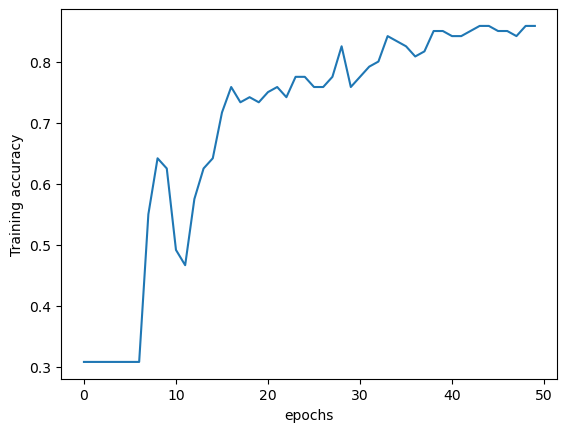

In [29]:
# visualization

plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("Training accuracy")

### Evaluate your model on test data

In [30]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 108ms/step - loss: 0.5049 - accuracy: 0.7333


[0.504940927028656, 0.7333333492279053]

Loss is the objective function. In classification problem, loss has no nice real meaning. We always use accuracy to measure the performance of each model. The higer the accuracy, the better the model.

For regression problem, loss and mse are the same.

In [31]:
# Predicted classes

y_pred = model.predict(X_test)

y_pred

# return index

y_pred = y_pred.argmax(axis = 1)

y_pred

1/1 [==============================] - 0s 46ms/step


array([0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0])

### Prediction Probabilities

A minor annoyance is that, even after training, our model still doesn't have very interpretable outputs:

In [32]:
model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


array([[ 2.68787   ,  0.50726825, -1.040758  ],
       [-0.20972449,  1.3489355 ,  1.1321765 ],
       [-0.51214564,  1.5861863 ,  1.243565  ],
       [ 3.4605231 ,  0.6466084 , -1.745798  ],
       [-1.0571148 ,  1.8712364 ,  2.5985198 ],
       [-0.6349875 ,  1.3036228 ,  1.7656465 ],
       [-0.91988313,  1.8532251 ,  1.5826068 ],
       [-0.3446964 ,  1.440368  ,  1.1706948 ],
       [-0.2988662 ,  1.5083538 ,  1.1437105 ],
       [ 2.7444093 ,  0.48516306, -1.1765848 ],
       [ 3.456107  ,  0.52056247, -1.7084068 ],
       [-0.3100138 ,  1.6199104 ,  1.1045035 ],
       [-0.579039  ,  1.6939856 ,  1.8163116 ],
       [ 2.7956653 ,  0.4625183 , -1.5893078 ],
       [-0.37349004,  1.2656878 ,  1.4323639 ],
       [-0.62367904,  1.625754  ,  1.7643822 ],
       [ 1.9064163 ,  0.20866904, -0.521234  ],
       [-0.35453656,  1.316127  ,  1.4225632 ],
       [ 2.846279  ,  0.43861136, -1.0334406 ],
       [-0.11010743,  1.524686  ,  0.87326175],
       [-0.90919614,  1.5436641 ,  2.320

Having trained our model, we can create a new, interpretable version by adding a Softmax layer.

In [33]:
# add softmax layer

prob_model = tf.keras.models.Sequential(

    [
        model,
        layers.Softmax()
    ]
)

prob_model(X_test)

<tf.Tensor: shape=(30, 3), dtype=float32, numpy=
array([[0.87950796, 0.09936111, 0.02113086],
       [0.10439765, 0.4961445 , 0.39945784],
       [0.06693387, 0.5456824 , 0.38738373],
       [0.9385691 , 0.05628577, 0.00514505],
       [0.01712656, 0.32021147, 0.66266197],
       [0.05268912, 0.36614123, 0.58116966],
       [0.03422175, 0.54783255, 0.41794562],
       [0.08687218, 0.5177551 , 0.39537278],
       [0.08829968, 0.5380527 , 0.3736476 ],
       [0.8894815 , 0.0928878 , 0.01763075],
       [0.9444497 , 0.05015198, 0.00539833],
       [0.08330912, 0.5739155 , 0.34277534],
       [0.04612384, 0.44780347, 0.50607276],
       [0.9013449 , 0.08742147, 0.01123366],
       [0.0817254 , 0.42096204, 0.49731252],
       [0.04678425, 0.44362503, 0.50959074],
       [0.7865719 , 0.1440178 , 0.06941021],
       [0.08177701, 0.4347015 , 0.48352152],
       [0.900348  , 0.08105385, 0.01859815],
       [0.11361253, 0.58265024, 0.3037372 ],
       [0.02639459, 0.30674574, 0.6668597 ],
      

Each row now reflects the model's level of confidence, which is much more interpretable.

(In case you're wondering, we don't include the Softmax layer in the model before we train it for numerical reasons).

In [34]:
predictions = prob_model.predict(X_test).argmax(axis = 1)

predictions

1/1 [==============================] - 0s 48ms/step


array([0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0])

In [35]:
# compute prediction accuracy by hand

np.sum(y_test == predictions) / np.size(y_test)

0.7333333333333333

Now we can discuss why do we need to set `from_logits = True`. Recall that when we construct neural network, we do not apply activation function to the output layer, which makes results less interpretable but easy to train. 

You can also add softmax layer when you construct the neural network:
If you add softmax layer in your model, you should define loss function with `from_logits=False` (default). Otherwise, you need to set `from_logits = True`.

In [36]:
# construct model
model2 = tf.keras.models.Sequential(
    
    [

        # first hidden layer
        layers.Dense(20, input_shape = (4, ), activation = "relu", kernel_initializer = "he_normal"), # 20 neurons, 4 features
    
        # second hidden layer
        layers.Dense(10, activation = "relu", kernel_initializer = "he_normal"), # 10 neurons
    
        # output
        layers.Dense(3), # 3 different categories (3 neurons)

        layers.Softmax()
    
    ]
)

# loss function

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)

# compile model

model2.compile(optimizer = "adam", loss = loss_fn, metrics = ["accuracy"])

# train the model

history = model2.fit(X_train, y_train, epochs = 50, batch_size = 20)

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 3.8742 - accuracy: 0.3583
Epoch 2/50
6/6 [==============================] - 0s 921us/step - loss: 2.9069 - accuracy: 0.2583
Epoch 3/50
6/6 [==============================] - 0s 809us/step - loss: 2.4168 - accuracy: 0.0083
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 2.1722 - accuracy: 0.0333
Epoch 5/50
6/6 [==============================] - 0s 835us/step - loss: 2.0051 - accuracy: 0.2083
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 1.8430 - accuracy: 0.3583
Epoch 7/50
6/6 [==============================] - 0s 862us/step - loss: 1.7001 - accuracy: 0.4500
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 1.5683 - accuracy: 0.4750
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 1.4525 - accuracy: 0.4667
Epoch 10/50
6/6 [==============================] - 0s 2ms/step - loss: 1.3383 - accuracy: 0.4833
Epoch 11/50
6/6 [==============

## What's next?

We've learned tensorflow, and we've used a simple deep neural network to make predictions on a pretty small data set. In coming lectures/discussions, we'll answer questions like:

- How can I represent text or images?
- How can I perform classification, regression, or clustering tasks?
- How can I interpret what my model is doing?
- How can I improve my model preformance?